# Transformers 如何使用
1. 导入torchvision.transforms
2. 定义数据预处理操作

transforms.ToTensor()将PIL图像或numpy.ndarray转换为tensor，并归一化到[0, 1]范围内。
transforms.Normalize(mean, std)对tensor进行归一化处理，mean和std分别为均值和标准差。


In [11]:
# 导入必要的库
from tensorboard.notebook import display  # 用于在Jupyter Notebook中显示TensorBoard
from torch.utils.data import DataLoader, Dataset  # 数据加载和自定义数据集
from torchvision import transforms  # 图像预处理工具
from torch.utils.tensorboard import SummaryWriter  # 用于记录和可视化训练过程
from PIL import Image  # 处理图像的库
import os  # 文件和路径操作
import cv2  # OpenCV库，用于图像处理
import matplotlib.pyplot as plt  # 用于绘图


In [12]:
# 定义图像路径
img_path = "./data/hymenoptera_data/train/ants/0013035.jpg"
# 使用PIL读取图像，PIL图像类型
img = Image.open(img_path)
# img.show()  # 显示图像（注释掉以避免阻塞）
print(img)  # 打印图像信息


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x16D3A2C10>


In [13]:
# 使用OpenCV读取图像，返回numpy数组类型
cv_img = cv2.imread(img_path)
# cv2.imshow("img", cv_img)
print(cv_img)

[[[233 151  80]
  [233 151  80]
  [233 151  80]
  ...
  [234 152  81]
  [232 150  79]
  [229 147  76]]

 [[234 152  81]
  [234 152  81]
  [234 152  81]
  ...
  [234 152  81]
  [232 150  79]
  [229 147  76]]

 [[235 153  82]
  [235 153  82]
  [235 153  82]
  ...
  [233 151  80]
  [232 150  79]
  [230 148  77]]

 ...

 [[237 160  87]
  [237 160  87]
  [236 159  86]
  ...
  [141  92  44]
  [235 158  95]
  [228 157  90]]

 [[237 160  87]
  [237 160  87]
  [236 159  86]
  ...
  [226 147  84]
  [255 160  90]
  [233 152  84]]

 [[237 160  87]
  [237 160  87]
  [236 159  86]
  ...
  [242 160  79]
  [250 159  78]
  [233 161  84]]]


Tensor 数据类型与普通图片数据类型有什么区别？为什么需要Tensor？
1. Tensor是PyTorch中用于表示多维数组的基本数据结构，类似于numpy中的ndarray，但具有更强大的功能。
2. Tensor可以在GPU上进行计算，从而加速深度学习模型的训练和推理。
3. Tensor还支持自动求导，可以方便地进行反向传播计算。
4. 使用torchvision.transforms将PIL图像转换为Tensor

In [14]:
# transforms 如何使用
# 可以理解为一个工具箱，将其赋予一个变量，该变量就成为了一个可以处理其他图片的工具
# 定义数据预处理操作
# tool = transforms.ToTensor() # 定义工具箱，设定其处理方式
# result = tool(input) # 处理input，返回结果
trans_tensor = transforms.ToTensor()
tensor_img = trans_tensor(img)  # 转换图像
print(tensor_img)  # 打印转换后的Tensor


tensor([[[0.3137, 0.3137, 0.3137,  ..., 0.3176, 0.3098, 0.2980],
         [0.3176, 0.3176, 0.3176,  ..., 0.3176, 0.3098, 0.2980],
         [0.3216, 0.3216, 0.3216,  ..., 0.3137, 0.3098, 0.3020],
         ...,
         [0.3412, 0.3412, 0.3373,  ..., 0.1725, 0.3725, 0.3529],
         [0.3412, 0.3412, 0.3373,  ..., 0.3294, 0.3529, 0.3294],
         [0.3412, 0.3412, 0.3373,  ..., 0.3098, 0.3059, 0.3294]],

        [[0.5922, 0.5922, 0.5922,  ..., 0.5961, 0.5882, 0.5765],
         [0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5882, 0.5765],
         [0.6000, 0.6000, 0.6000,  ..., 0.5922, 0.5882, 0.5804],
         ...,
         [0.6275, 0.6275, 0.6235,  ..., 0.3608, 0.6196, 0.6157],
         [0.6275, 0.6275, 0.6235,  ..., 0.5765, 0.6275, 0.5961],
         [0.6275, 0.6275, 0.6235,  ..., 0.6275, 0.6235, 0.6314]],

        [[0.9137, 0.9137, 0.9137,  ..., 0.9176, 0.9098, 0.8980],
         [0.9176, 0.9176, 0.9176,  ..., 0.9176, 0.9098, 0.8980],
         [0.9216, 0.9216, 0.9216,  ..., 0.9137, 0.9098, 0.

In [15]:
# 创建SummaryWriter对象，用于记录日志
writer = SummaryWriter("./logs/3_Transforms")
# writer.add_image("Tensor_img", tensor_img)  # 添加图像到日志
# writer.close()  # 关闭日志


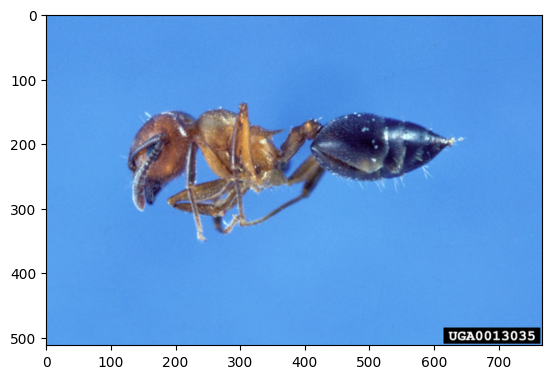

In [17]:
# 常见Transforms中的工具使用
# 重点关注：输入、输出、作用
img_path = "./data/hymenoptera_data/train/ants/0013035.jpg"
# Image读取到的是PIL类型
img = Image.open(img_path)
# img.show()
# print(img)
# display(img)
plt.imshow(img)

In [18]:
# ToTensor: 将PIL图像或numpy.ndarray转换为tensor，并归一化到[0, 1]范围内
# 将其他数据类型转换为Tensor类型
trans_tensor = transforms.ToTensor()
img_tensor = trans_tensor(img)
writer.add_image("ToTensor", img_tensor)

In [23]:
# Normalize: 对tensor进行归一化处理，mean和std分别为均值和标准差
# 作用：改变图片中的一些数值，使其更符合模型的要求，契合后面的网络
# 例如：input[0, 1], 使用mean=0.5, std=0.5进行归一化处理，结果为output[-1, 1]
# 计算公式: output = (input - mean) / std
    #Args:
        #mean (sequence): Sequence of means for each channel.
        #std (sequence): Sequence of standard deviations for each channel.
        #mean和std需要根据图片的信道来进行填充，eg：RGB图片为三通道，PNG为四通道
        #inplace(bool,optional): Bool to make this operation in-place.默认为False
print(img_tensor[0][0][0])
trans_norm = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
img_norm = trans_norm(img_tensor)
print(img_norm[0][0][0]) # -1.0
writer.add_image("Normalize", img_norm)

tensor([[[0.3137, 0.3137, 0.3137,  ..., 0.3176, 0.3098, 0.2980],
         [0.3176, 0.3176, 0.3176,  ..., 0.3176, 0.3098, 0.2980],
         [0.3216, 0.3216, 0.3216,  ..., 0.3137, 0.3098, 0.3020],
         ...,
         [0.3412, 0.3412, 0.3373,  ..., 0.1725, 0.3725, 0.3529],
         [0.3412, 0.3412, 0.3373,  ..., 0.3294, 0.3529, 0.3294],
         [0.3412, 0.3412, 0.3373,  ..., 0.3098, 0.3059, 0.3294]],

        [[0.5922, 0.5922, 0.5922,  ..., 0.5961, 0.5882, 0.5765],
         [0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5882, 0.5765],
         [0.6000, 0.6000, 0.6000,  ..., 0.5922, 0.5882, 0.5804],
         ...,
         [0.6275, 0.6275, 0.6235,  ..., 0.3608, 0.6196, 0.6157],
         [0.6275, 0.6275, 0.6235,  ..., 0.5765, 0.6275, 0.5961],
         [0.6275, 0.6275, 0.6235,  ..., 0.6275, 0.6235, 0.6314]],

        [[0.9137, 0.9137, 0.9137,  ..., 0.9176, 0.9098, 0.8980],
         [0.9176, 0.9176, 0.9176,  ..., 0.9176, 0.9098, 0.8980],
         [0.9216, 0.9216, 0.9216,  ..., 0.9137, 0.9098, 0.

In [24]:
# Resize:Resize the input image to the given size
# 将传入的图像进行尺寸缩放
# Args:
#         size (sequence or int): Desired output size. If size is a sequence like
#             (h, w), output size will be matched to this. If size is an int,
#             smaller edge of the image will be matched to this number.
#             i.e, if height > width, then image will be rescaled to
#             (size * height / width, size).
print(img_tensor.shape)
trans_resize = transforms.Resize((512, 512))
img_resize = trans_resize(img_tensor)
print(img_resize)
print(img_resize.shape)
writer.add_image("Resize", img_resize)

torch.Size([3, 512, 768])
tensor([[[0.3137, 0.3137, 0.3176,  ..., 0.3147, 0.3157, 0.3010],
         [0.3176, 0.3176, 0.3176,  ..., 0.3118, 0.3157, 0.3010],
         [0.3216, 0.3216, 0.3176,  ..., 0.3078, 0.3127, 0.3039],
         ...,
         [0.3412, 0.3382, 0.3373,  ..., 0.0029, 0.2225, 0.3578],
         [0.3412, 0.3382, 0.3373,  ..., 0.3461, 0.3353, 0.3353],
         [0.3412, 0.3382, 0.3373,  ..., 0.3598, 0.3088, 0.3235]],

        [[0.5922, 0.5922, 0.5961,  ..., 0.5931, 0.5941, 0.5794],
         [0.5961, 0.5961, 0.5961,  ..., 0.5902, 0.5941, 0.5794],
         [0.6000, 0.6000, 0.5961,  ..., 0.5863, 0.5912, 0.5824],
         ...,
         [0.6275, 0.6245, 0.6235,  ..., 0.0775, 0.4255, 0.6167],
         [0.6275, 0.6245, 0.6235,  ..., 0.5324, 0.5892, 0.6039],
         [0.6275, 0.6245, 0.6235,  ..., 0.6402, 0.6265, 0.6294]],

        [[0.9137, 0.9137, 0.9176,  ..., 0.9147, 0.9157, 0.9010],
         [0.9176, 0.9176, 0.9176,  ..., 0.9118, 0.9157, 0.9010],
         [0.9216, 0.9216, 0.9176

In [25]:
# Compose:Composes several transforms together
# 将多个Transforms的工具整合到一起，一次调用，方便使用
    # Example:
    #     >>> transforms.Compose([
    #     >>>     transforms.CenterCrop(10),
    #     >>>     transforms.PILToTensor(),
    #     >>>     transforms.ConvertImageDtype(torch.float),
    #     >>> ])

# 这里将前面的几种变化结合起来:ToTensor,Normalize,Resize
trans_compose = transforms.Compose([
    trans_tensor,
    trans_norm,
    trans_resize,
])
img_compose = trans_compose(img)
writer.add_image("Compose", img_compose)

In [26]:
# RandomCrop:Crop the given image at a random location
    # Args:
    #     size (sequence or int): Desired output size of the crop. If size is an
    #         int instead of sequence like (h, w), a square crop (size, size) is
    #         made. If provided a sequence of length 1, it will be interpreted as (size[0], size[0]).
    #     padding (int or sequence, optional): Optional padding on each border
    #         of the image. Default is None. If a single int is provided this
    #         is used to pad all borders. If sequence of length 2 is provided this is the padding
    #         on left/right and top/bottom respectively. If a sequence of length 4 is provided
    #         this is the padding for the left, top, right and bottom borders respectively.

    #         .. note::
    #             In torchscript mode padding as single int is not supported, use a sequence of
    #             length 1: ``[padding, ]``.
    #     pad_if_needed (boolean): It will pad the image if smaller than the
    #         desired size to avoid raising an exception. Since cropping is done
    #         after padding, the padding seems to be done at a random offset.
    #     fill (number or tuple): Pixel fill value for constant fill. Default is 0. If a tuple of
    #         length 3, it is used to fill R, G, B channels respectively.
    #         This value is only used when the padding_mode is constant.
    #         Only number is supported for torch Tensor.
    #         Only int or tuple value is supported for PIL Image.
    #     padding_mode (str): Type of padding. Should be: constant, edge, reflect or symmetric.
    #         Default is constant.

    #         - constant: pads with a constant value, this value is specified with fill

    #         - edge: pads with the last value at the edge of the image.
    #           If input a 5D torch Tensor, the last 3 dimensions will be padded instead of the last 2

    #         - reflect: pads with reflection of image without repeating the last value on the edge.
    #           For example, padding [1, 2, 3, 4] with 2 elements on both sides in reflect mode
    #           will result in [3, 2, 1, 2, 3, 4, 3, 2]

    #         - symmetric: pads with reflection of image repeating the last value on the edge.
    #           For example, padding [1, 2, 3, 4] with 2 elements on both sides in symmetric mode
    #           will result in [2, 1, 1, 2, 3, 4, 4, 3]

    # 参数有点多，其他都有默认值一般不用管，一般只需要第一个size
    # size:和resize不同，(h, w)是按照高和宽来进行裁剪,如果是单个数字x则会裁剪为边长为x的正方形
trans_randomcrop_1 = transforms.RandomCrop(128)
trans_randomcrop_2 = transforms.RandomCrop((180, 320))

for i in range(100):
    img_randomcrop = trans_randomcrop_1(img_tensor)
    writer.add_image("RandomCrop1", img_randomcrop, i)
    img_randomcrop = trans_randomcrop_2(img_tensor)
    writer.add_image("RandomCrop2", img_randomcrop, i)

In [27]:
writer.close()